# Bird image classification 🦜


In [21]:
import numpy as np
import pandas as pd
import torch
from IPython.display import display, Image
print(f"Pytorch version: {torch.__version__} ")
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    print("GPU not found. Using CPU instead.")

Pytorch version: 1.13.1+cpu 
GPU not found. Using CPU instead.


### Accessing the data

Let's start with `birds.csv` which contains all of the image ID's and their assosciated bird breed (our data and labels).

In [18]:
labels_csv = pd.read_csv("./birds.csv") #Entire train, valid, and test set
labels_train = labels_csv.loc[(labels_csv['data set'] == 'train') & labels_csv['labels']]    #Just train set
#print(labels_csv.describe())
#print(labels_csv.head())
print(labels_train.describe())
print(labels_train.head())
print("Unique breeds:", len(labels_train['class id'].unique()))

           class id
count  70626.000000
mean     225.117138
std      130.140774
min        0.000000
25%      112.000000
50%      226.000000
75%      337.000000
max      449.000000
   class id                      filepaths           labels  \
0         0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER   
1         0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER   
2         0  train/ABBOTTS BABBLER/003.jpg  ABBOTTS BABBLER   
3         0  train/ABBOTTS BABBLER/004.jpg  ABBOTTS BABBLER   
4         0  train/ABBOTTS BABBLER/005.jpg  ABBOTTS BABBLER   

       scientific label data set  
0  Malacocincla abbotti    train  
1  Malacocincla abbotti    train  
2  Malacocincla abbotti    train  
3  Malacocincla abbotti    train  
4  Malacocincla abbotti    train  
Unique breeds: 450


Looking at this, we can see there are 70626 different images and 450 different breeds.

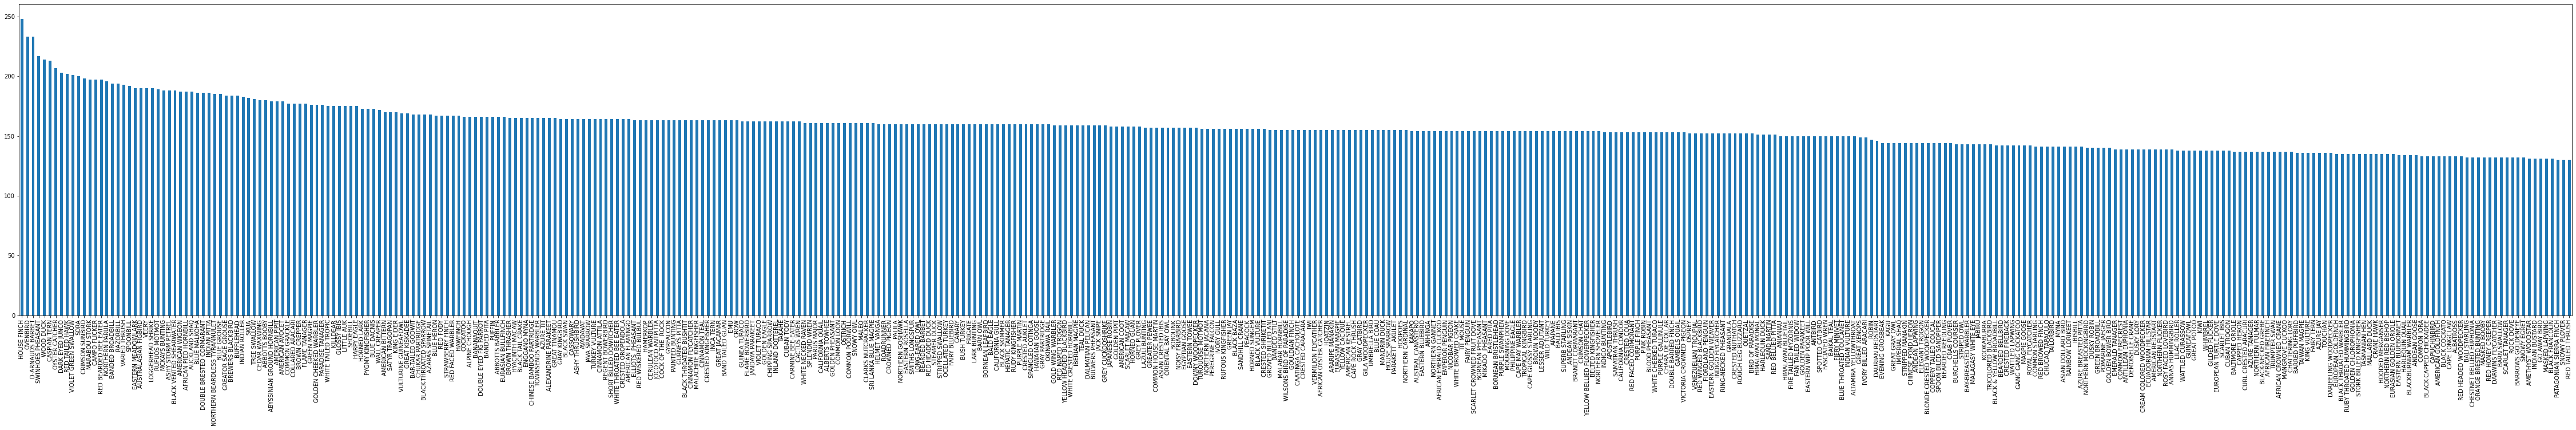

In [19]:
labels_train['labels'].value_counts().plot.bar(figsize=(80, 10));

If we roughly draw a line across the middle of the graph, we'd see there's about 150+ images for each bird breed/

This is a good amount as for some of their vision products [Google recommends a minimum of 10 images per class to get started](https://cloud.google.com/vision/automl/object-detection/docs/prepare). And as you might imagine, the more images per class available, the more chance a model has to figure out patterns between them.

Let's check out one of the images.

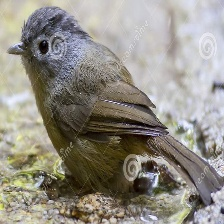

In [25]:
Image('data/train/ABBOTTS BABBLER/001.jpg')